### Step 1: Opening the files and reviewing the general information

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.getcwd()
import os
os.chdir(r"C:\Users\Juan\OneDrive\Documentos\Portfolio")

In [3]:
games = pd.read_csv("games.csv")
print(games.info())
print()
print(games.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     2

### Step 2: Data Preparation
 

In [4]:
games.columns = games.columns.str.lower()
print(games.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [5]:
# Convert columns to appropriate data types
games = games.assign(
    year_of_release=pd.to_datetime(
        games["year_of_release"],
        format="%Y",
        errors="coerce"
    ),
    user_score=pd.to_numeric(
        games["user_score"],
        errors="coerce"
    )
)

games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       7590 non-null   float64       
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB


The data types of the year_of_release and user_score columns were converted to datetime and float, respectively. This transformation was performed because year_of_release represents temporal information, while having user_score stored as an object type limits numerical analysis. Since user_score is a quantitative variable, converting it to a numeric data type enables proper statistical analysis and data processing.


In [6]:
# Check missing values and inspect unique entries
print(games.isna().sum())

print("\nUnique values in selected columns:")
print("user_score:", games["user_score"].unique())
print("critic_score:", games["critic_score"].unique())
print("rating:", games["rating"].unique())



name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Unique values in selected columns:
user_score: [8.  nan 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 7.5 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 8.8
 6.9 9.4 6.8 6.1 6.7 5.4 4.  4.9 4.5 9.3 6.2 4.2 6.  3.7 4.1 5.8 5.6 5.5
 4.4 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.  2.7 2.2 2.  9.5
 2.1 3.6 2.8 1.8 3.8 0.  1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1.2 2.3 0.5 1.3
 0.2 0.6 1.4 0.9 1.  9.7]
critic_score: [76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46

In [7]:
# Clean data: remove rows with missing 'name' and fill missing 'rating'
games = games.dropna(subset=["name"])
games["rating"] = games["rating"].fillna("unknown")

# Check for duplicate rows
print("Number of duplicated rows:", games.duplicated().sum())


Number of duplicated rows: 0


It was decided to remove the two rows with missing name values, as this is a negligible number compared to the total number of rows in the DataFrame. By doing so, the same rows with missing genre values were also removed.

I chose not to fill the missing values in the year_of_release column, as imputing them could introduce bias and distort the trend analysis. Similarly, missing critic_score values were not filled, since the absence of these scores indicates that the games were never reviewed. Because this is not a random error, I decided to leave the missing values as they are.

In the same way, the missing values in the user_score column were kept, as they represent games that were not rated by users, and filling them could distort the analysis of user preferences.

Finally, the rating column contains 6,766 missing values, likely corresponding to older games or titles that were not classified in certain regions. These missing values were retained and labeled as 'Unknown' to avoid introducing bias into the analysis.

In [8]:
# Create a new column for total sales across all regions
games["total_sales"] = games["na_sales"] + games["eu_sales"] + games["jp_sales"]

# Preview the updated DataFrame
print(games.head())


                       name platform year_of_release         genre  na_sales  \
0                Wii Sports      Wii      2006-01-01        Sports     41.36   
1         Super Mario Bros.      NES      1985-01-01      Platform     29.08   
2            Mario Kart Wii      Wii      2008-01-01        Racing     15.68   
3         Wii Sports Resort      Wii      2009-01-01        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB      1996-01-01  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score   rating  \
0     28.96      3.77         8.45          76.0         8.0        E   
1      3.58      6.81         0.77           NaN         NaN  unknown   
2     12.76      3.79         3.29          82.0         8.3        E   
3     10.93      3.28         2.95          80.0         8.0        E   
4      8.89     10.22         1.00           NaN         NaN  unknown   

   total_sales  
0        74.09  
1        39.47  
2        32.23  
3        29.

### Step 3: Data Analysis

      year  count
0   1980.0      9
1   1981.0     46
2   1982.0     36
3   1983.0     17
4   1984.0     14
5   1985.0     14
6   1986.0     21
7   1987.0     16
8   1988.0     15
9   1989.0     17
10  1990.0     16
11  1991.0     41
12  1992.0     43
13  1993.0     60
14  1994.0    121
15  1995.0    219
16  1996.0    263
17  1997.0    289
18  1998.0    379
19  1999.0    338
20  2000.0    350
21  2001.0    482
22  2002.0    829
23  2003.0    775
24  2004.0    762
25  2005.0    939
26  2006.0   1006
27  2007.0   1197
28  2008.0   1427
29  2009.0   1426
30  2010.0   1255
31  2011.0   1136
32  2012.0    653
33  2013.0    544
34  2014.0    581
35  2015.0    606
36  2016.0    502


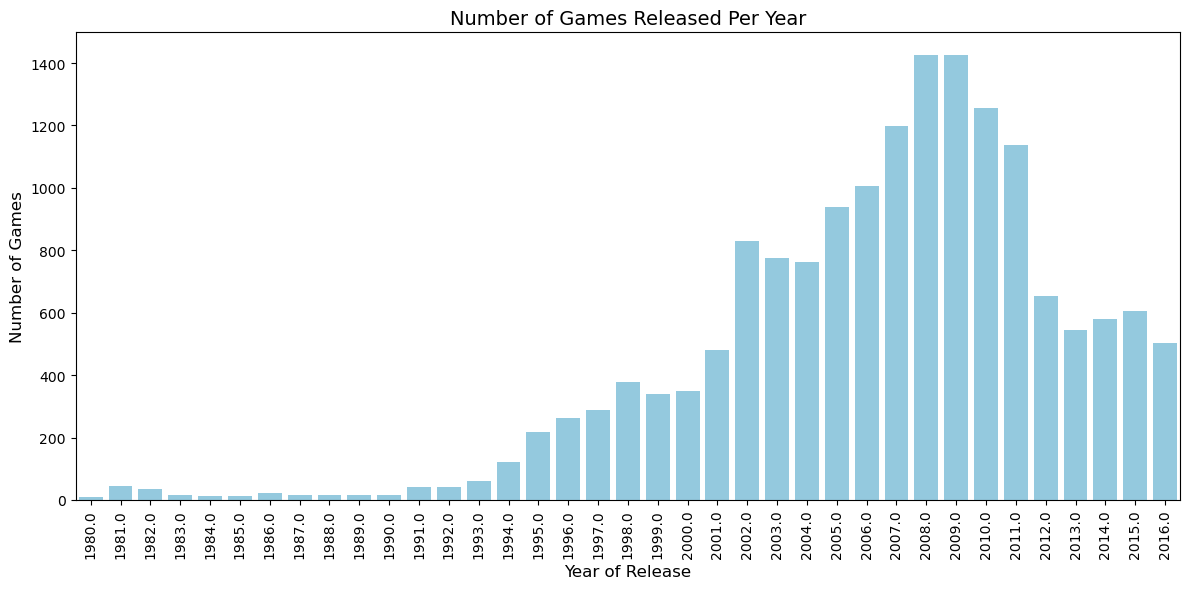

In [9]:
# Extract year from the release date
games["year"] = games["year_of_release"].dt.year

# Aggregate the number of games released per year
games_by_year = (
    games.groupby("year")
    .size()
    .reset_index(name="count")
)

# Display the aggregated data
print(games_by_year)

# Plot the number of games released per year
plt.figure(figsize=(12, 6))
sns.barplot(data=games_by_year, x="year", y="count", color="skyblue")
plt.xticks(rotation=90)
plt.title("Number of Games Released Per Year", fontsize=14)
plt.ylabel("Number of Games", fontsize=12)
plt.xlabel("Year of Release", fontsize=12)
plt.tight_layout()  # Ensure labels are fully visible
plt.show()


The bar chart shows that the number of video games released per year increases progressively over time, reflecting the growth and maturation of the video game industry.

The early years, particularly during the 1980s and early 1990s, show a very limited number of releases. These values can be considered outliers due to the small market size and the fact that the industry was still in its early stages of development. As a result, data from this period are less representative and should be interpreted with caution.

From the late 1990s onwards, a more stable and consistent growth in the number of released games is observed. This period contains a larger volume of data, making it more significant and reliable for trend analysis, platform comparisons, and market behavior studies.

In conclusion, while the early years provide important historical context, more recent periods are more relevant analytically due to their greater consistency and statistical representativeness.

In [10]:

# Identify the top 6 platforms by total sales
top_platforms = (
    games.groupby("platform")["total_sales"]
    .sum()
    .sort_values(ascending=False)
    .head(6)
)

# Display the top platforms
print("Top 6 platforms by total sales:")



Top 6 platforms by total sales:


In [11]:
# Clean platform column
games["platform"] = games["platform"].astype(str).str.strip()

# Identify top 6 platforms by total sales
top_platforms = (
    games.groupby("platform")["total_sales"]
    .sum()
    .sort_values(ascending=False)
    .head(6)
)

# Get list of platform names, stripped of spaces
top_platforms_list = [str(p).strip() for p in top_platforms.index]
print("Top platforms:", top_platforms_list)

# Filter games for top platforms and valid years
top_games = games[
    games["platform"].isin(top_platforms_list) &
    games["year"].notna()
]

# Aggregate total sales per year for each top platform
sales_by_year_platform = (
    top_games.groupby(["year", "platform"])["total_sales"]
    .sum()
    .reset_index()
)

print("Total sales by year for top platforms:")
print(sales_by_year_platform)


Top platforms: ['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS']
Total sales by year for top platforms:
      year platform  total_sales
0   1985.0       DS         0.02
1   1994.0       PS         5.63
2   1995.0       PS        34.00
3   1996.0       PS        89.16
4   1997.0       PS       128.30
..     ...      ...          ...
62  2015.0      Wii         1.05
63  2015.0     X360        10.86
64  2016.0      PS3         3.23
65  2016.0      Wii         0.17
66  2016.0     X360         1.40

[67 rows x 3 columns]


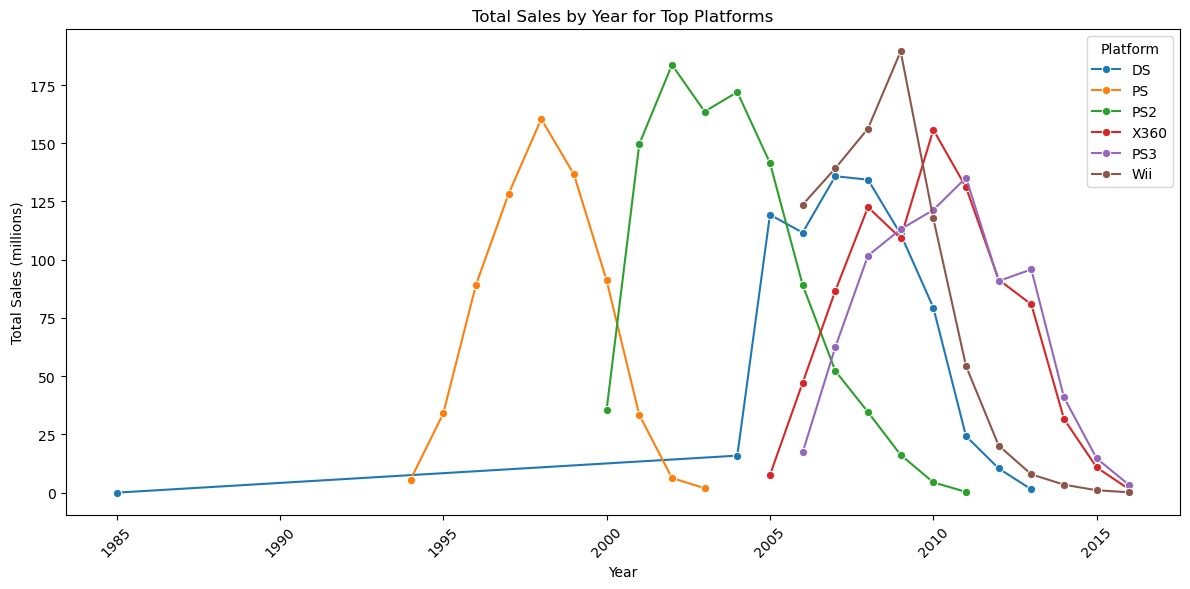

In [12]:
# Lineplot of total sales by year for top platforms
plt.figure(figsize=(12,6))
sns.lineplot(
    data=sales_by_year_platform,
    x="year",
    y="total_sales",
    hue="platform",
    marker="o"
)
plt.title("Total Sales by Year for Top Platforms")
plt.xlabel("Year")
plt.ylabel("Total Sales (millions)")
plt.xticks(rotation=45)
plt.legend(title="Platform")
plt.tight_layout()
plt.show()


The line plot of total sales by year reveals that, on average, most platforms experienced peak sales for approximately 6 to 7 years following their release. Notably, the PS3 and X360 stand out, maintaining significant sales for around 10 years after launch.

In [13]:
# Filter games released after 2011 for analysis
relevant_years = games.loc[games["year"] > 2011]


We decided to focus on the last five years of data, considering that the average lifecycle of a gaming platform is approximately seven years. Next, we will examine which platforms remain active.

   platform  total_sales
0       PS4       265.79
1       PS3       245.53
2      X360       216.14
3       3DS       185.74
4      XOne       145.05
5      WiiU        76.24
6        PC        56.88
7       PSV        43.38
8       Wii        32.76
9        DS        11.84
10      PSP        11.02


C:\Users\Juan\AppData\Local\Temp\ipykernel_5864\3739102586.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=relevant_games, x="platform", y="total_sales", palette="viridis")


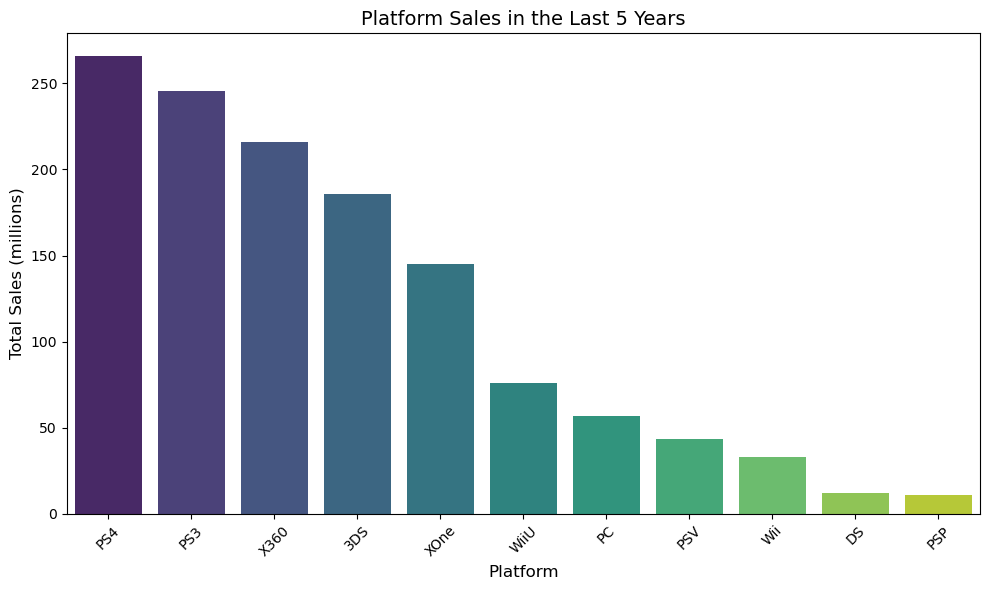

In [14]:
# Aggregate total sales by platform for the last 5 years and sort in descending order
relevant_games = (
    relevant_years.groupby("platform")["total_sales"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Display the aggregated data
print(relevant_games)

# Plot total sales per platform over the last 5 years
plt.figure(figsize=(10,6))
sns.barplot(data=relevant_games, x="platform", y="total_sales", palette="viridis")
plt.title("Platform Sales in the Last 5 Years", fontsize=14)
plt.xlabel("Platform", fontsize=12)
plt.ylabel("Total Sales (millions)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The bar chart indicates that the platforms expected to lead the market in 2017 are PS4, PS3, X360, 3DS, and XOne. In contrast, platforms such as WiiU, PC, PSV, WII, DS, and PSP show a declining trend in sales.

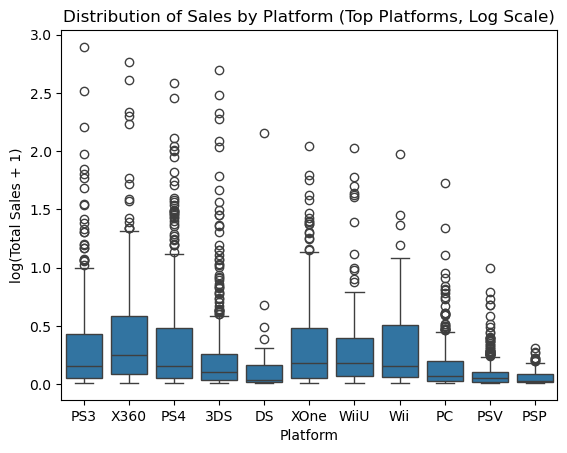

In [15]:
# a logarithmic scale (np.log1p) is applied to better visualize highly skewed sales data
sns.boxplot(data=relevant_years, x="platform", y=np.log1p(relevant_years["total_sales"]))
plt.ylabel("log(Total Sales + 1)")
plt.title("Distribution of Sales by Platform (Top Platforms, Log Scale)")
plt.xlabel("Platform")
plt.show()


The logarithmic boxplot reveals that the median sales for most platforms are around 0.2 (equivalent to approximately 0.22 million in the original scale). It is important to note that the mean sales would be heavily influenced by the presence of outliers for each platform, making the median a more reliable measure to understand the central tendency of sales.

In [16]:
# Filter games released in the last 5 years for the PS4 platform
ps4_games = relevant_years[relevant_years["platform"] == "PS4"]

# Remove rows with missing values in 'critic_score' or 'user_score' for this analysis
ps4_games = ps4_games.dropna(subset=["critic_score", "user_score"])

# Display the last rows to inspect the cleaned dataset
print(ps4_games.tail())


                                        name platform year_of_release  \
16486                     Super Dungeon Bros      PS4      2016-01-01   
16499  Sherlock Holmes: The Devil's Daughter      PS4      2016-01-01   
16500                            Root Letter      PS4      2016-01-01   
16526                             Dungeons 2      PS4      2016-01-01   
16530                Carmageddon: Max Damage      PS4      2016-01-01   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
16486        Action      0.01       0.0      0.00          0.0          42.0   
16499     Adventure      0.01       0.0      0.00          0.0          70.0   
16500     Adventure      0.00       0.0      0.01          0.0          69.0   
16526  Role-Playing      0.01       0.0      0.00          0.0          61.0   
16530        Action      0.01       0.0      0.00          0.0          51.0   

       user_score   rating  total_sales    year  
16486         2.3     E10+    

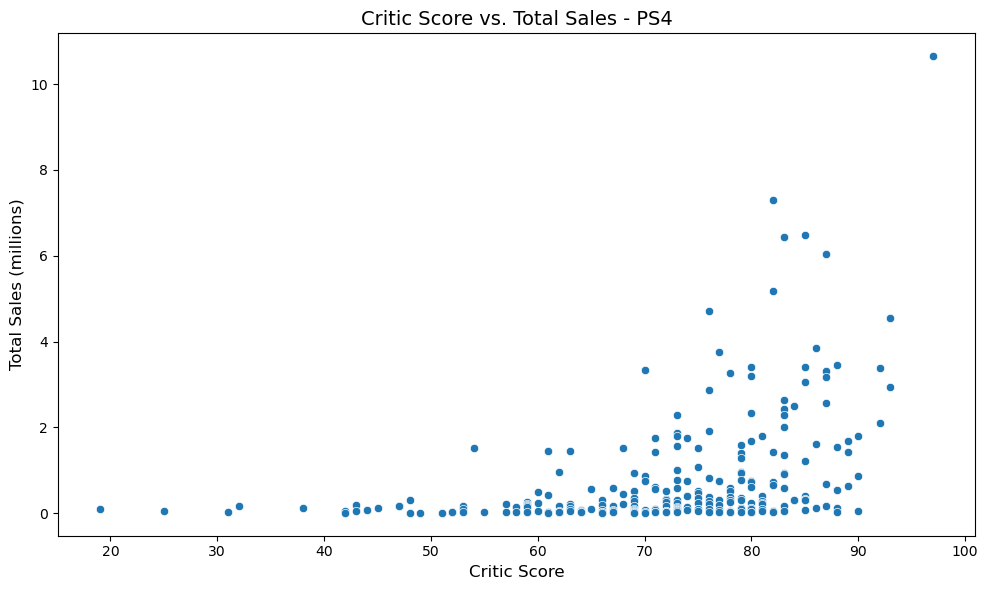

The correlation between critic score and total sales is: 0.41


In [17]:
# Scatter plot of total sales vs. critic scores for PS4 games
plt.figure(figsize=(10,6))
sns.scatterplot(data=ps4_games, x="critic_score", y="total_sales")
plt.title("Critic Score vs. Total Sales - PS4", fontsize=14)
plt.xlabel("Critic Score", fontsize=12)
plt.ylabel("Total Sales (millions)", fontsize=12)
plt.tight_layout()
plt.show()

# Calculate correlation between critic score and total sales
critic_corr = ps4_games["critic_score"].corr(ps4_games["total_sales"])
print(f"The correlation between critic score and total sales is: {critic_corr:.2f}")


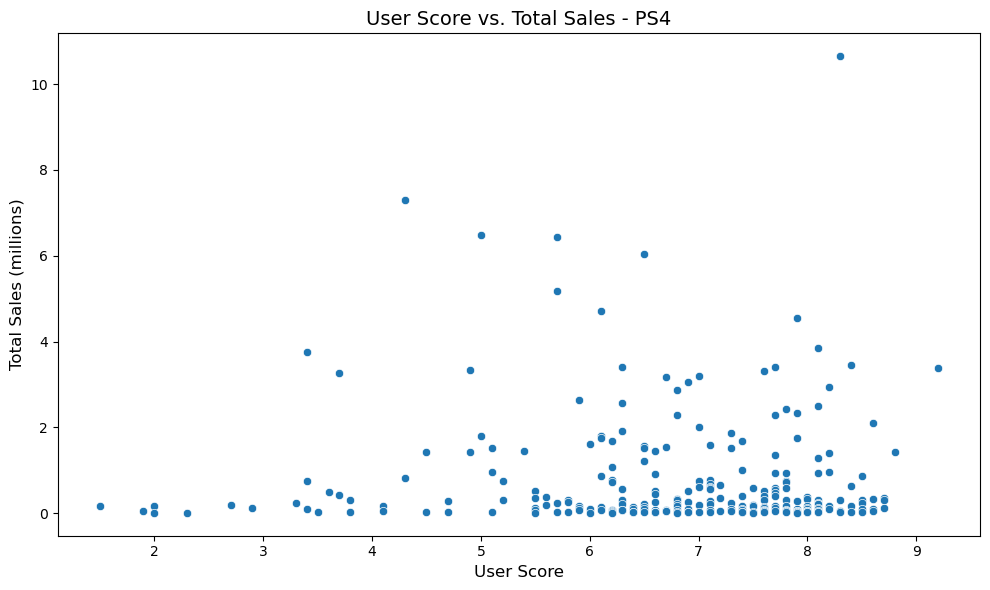

The correlation between user score and total sales is: -0.03


In [18]:
# Scatter plot of total sales vs. user scores for PS4 games
plt.figure(figsize=(10,6))
sns.scatterplot(data=ps4_games, x="user_score", y="total_sales")
plt.title("User Score vs. Total Sales - PS4", fontsize=14)
plt.xlabel("User Score", fontsize=12)
plt.ylabel("Total Sales (millions)", fontsize=12)
plt.tight_layout()
plt.show()

# Calculate correlation between user score and total sales
user_corr = ps4_games["user_score"].corr(ps4_games["total_sales"])
print(f"The correlation between user score and total sales is: {user_corr:.2f}")


Analysis of PS4 games reveals the following insights:

The correlation between critic scores and total sales is 0.405, indicating a moderate positive relationship. In general, games with higher critic ratings tend to achieve greater sales.

The correlation between user scores and total sales is -0.032, which is essentially negligible. This suggests that user reviews have little to no clear impact on sales.

For the PS4 platform, critic reviews appear to be a better predictor of sales than user reviews, implying that players may be more influenced by professional evaluations than by peer opinions.

In [19]:
# Count the number of platforms each game was released on
platform_counts = (
    games.groupby("name")["platform"]
    .nunique()
    .reset_index()
    .rename(columns={"platform": "num_platforms"})
)

# Display the first few rows
print(platform_counts.head())


                          name  num_platforms
0               Beyblade Burst              1
1            Fire Emblem Fates              1
2         Frozen: Olaf's Quest              2
3   Haikyu!! Cross Team Match!              1
4            Tales of Xillia 2              1


In [20]:
# Filter games released on more than one platform and sort by the number of platforms
multi_games = (
    platform_counts[platform_counts["num_platforms"] > 1]
    .sort_values(by="num_platforms", ascending=False)
)

# Display the top 10 games available on the most platforms
print(multi_games.head(10))


                              name  num_platforms
6715   Need for Speed: Most Wanted             10
2952                       FIFA 14              9
5470                 Madden NFL 07              9
7785                   Ratatouille              9
5143      LEGO Marvel Super Heroes              9
5211  Lego Batman 3: Beyond Gotham              8
2953                       FIFA 15              8
1306                          Cars              8
2969                FIFA Soccer 13              8
9990      The LEGO Movie Videogame              8


In [21]:
# Filter all releases of "Need for Speed: Most Wanted" and aggregate total sales by platform
nfs = games[games["name"] == "Need for Speed: Most Wanted"]

nfs_sales = (
    nfs.groupby("platform")["total_sales"]
    .sum()
    .reset_index()
    .sort_values(by="total_sales", ascending=False)
)

# Display the top platforms by total sales for this game
print(nfs_sales.head())


  platform  total_sales
4      PS2         3.90
8     X360         2.56
5      PS3         2.23
9       XB         0.99
6      PSV         0.79


C:\Users\Juan\AppData\Local\Temp\ipykernel_5864\4201603704.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=nfs, x="platform", y="total_sales", palette="viridis")


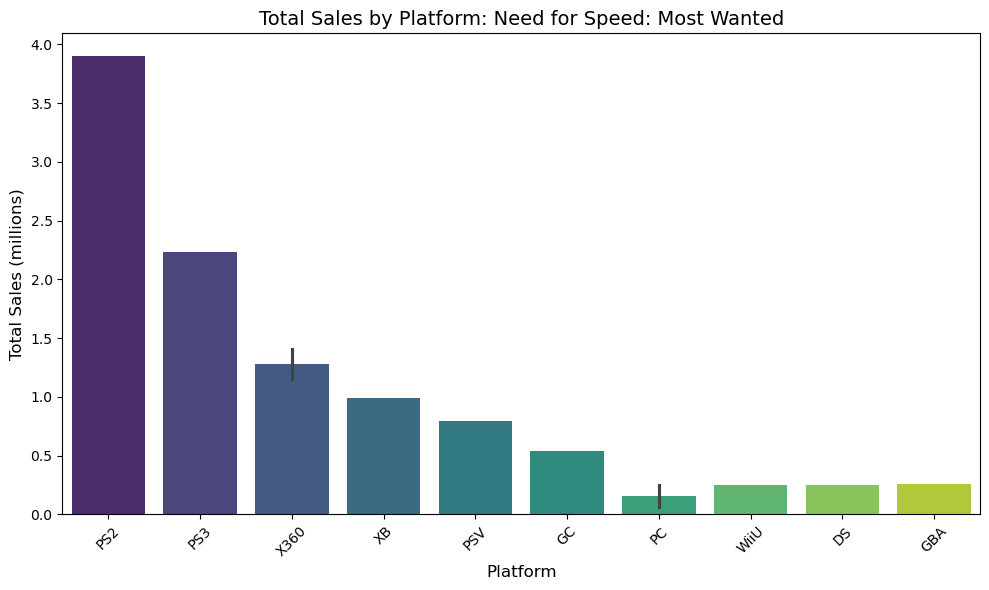

In [22]:
# Bar plot of total sales by platform for "Need for Speed: Most Wanted"
plt.figure(figsize=(10,6))
sns.barplot(data=nfs, x="platform", y="total_sales", palette="viridis")
plt.title("Total Sales by Platform: Need for Speed: Most Wanted", fontsize=14)
plt.xlabel("Platform", fontsize=12)
plt.ylabel("Total Sales (millions)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The game with the most platform releases in the dataset was analyzed to observe and compare its total sales across different platforms. It is evident that the top three platforms in terms of sales also rank among the top platforms in our overall analysis. Sales on the remaining platforms are below one million dollars. This finding supports our profitability analysis, which identified PS2, PS3, and X360 as the platforms with the highest sales.

C:\Users\Juan\AppData\Local\Temp\ipykernel_5864\4224682977.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_profitable, x="genre", y="total_sales", palette="magma")


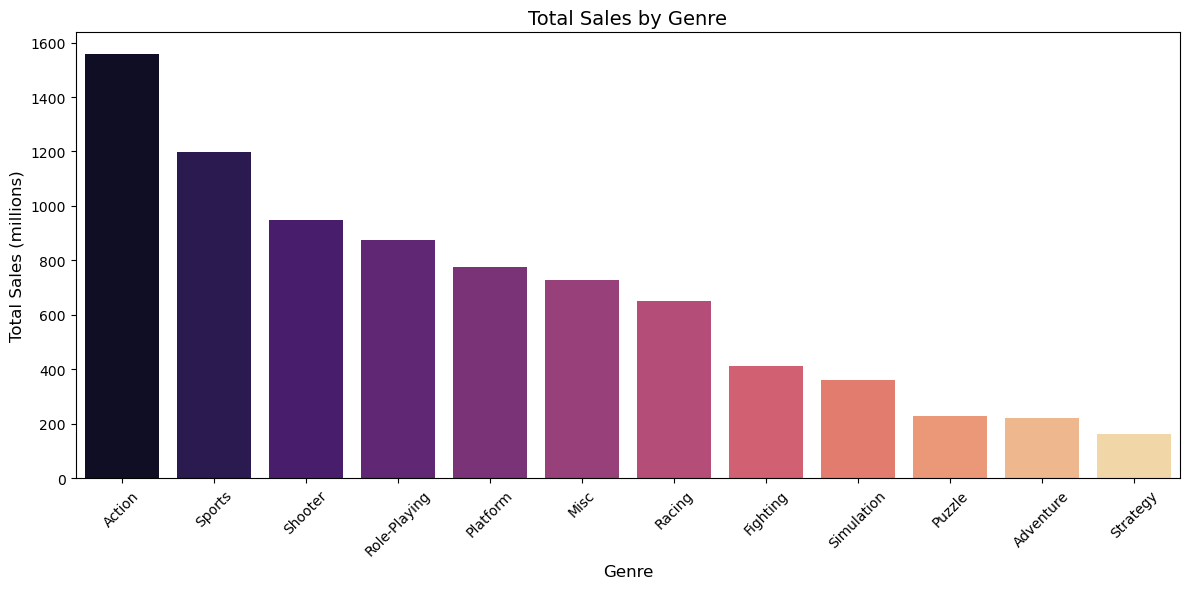

In [23]:
# Aggregate total sales by genre and sort in descending order
most_profitable = (
    games.groupby("genre")["total_sales"]
    .sum()
    .reset_index()
    .sort_values(by="total_sales", ascending=False)
)

# Bar plot of total sales by genre
plt.figure(figsize=(12,6))
sns.barplot(data=most_profitable, x="genre", y="total_sales", palette="magma")
plt.title("Total Sales by Genre", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Total Sales (millions)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Analyzing the overall distribution of sales by genre, we observe that Action, Sports, and Shooter are the most profitable genres, with total sales of approximately 1,600, 1,200, and 1,000 million dollars, respectively. These genres account for the majority of global sales, indicating sustained high demand over time.

In contrast, genres such as Puzzle, Adventure, and Strategy show considerably lower sales, averaging around 200 million dollars, suggesting they cater to smaller or niche audiences.

Overall, high-selling genres are often associated with more accessible, competitive, or fast-paced gameplay experiences, which favor widespread adoption. Conversely, lower-selling genres tend to be more specialized, require greater time investment, or appeal to more specific audiences, limiting their commercial reach.

In conclusion, genre is a significant factor in a video game's commercial performance, with a clear distinction between high-revenue genres and those with lower sales impact.

Step 4: Creating a User Profile for Each Region

C:\Users\Juan\AppData\Local\Temp\ipykernel_5864\3645458975.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=na_sales, x="platform", y="na_sales_pct", palette="Blues_r")


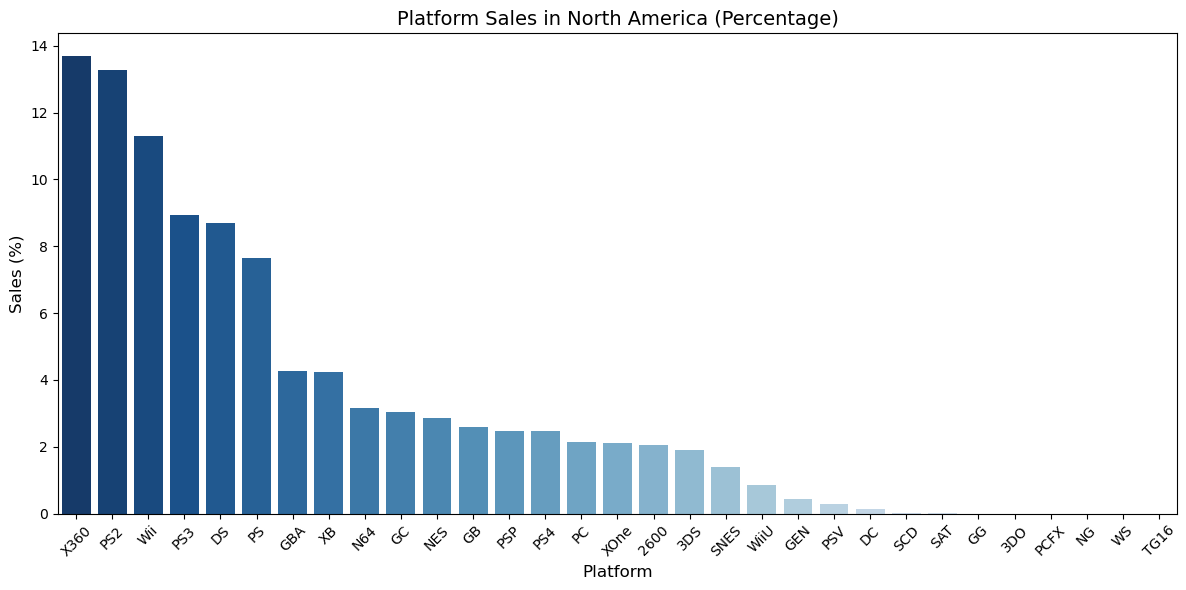

In [24]:
# Aggregate total sales by platform in North America and calculate percentage contribution
na_sales = (
    games.groupby("platform")["na_sales"]
    .sum()
    .reset_index()
    .sort_values(by="na_sales", ascending=False)
)

# Calculate percentage of total NA sales per platform
na_sales["na_sales_pct"] = na_sales["na_sales"] / na_sales["na_sales"].sum() * 100

# Bar plot of North American sales percentage by platform
plt.figure(figsize=(12,6))
sns.barplot(data=na_sales, x="platform", y="na_sales_pct", palette="Blues_r")
plt.title("Platform Sales in North America (Percentage)", fontsize=14)
plt.xlabel("Platform", fontsize=12)
plt.ylabel("Sales (%)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Juan\AppData\Local\Temp\ipykernel_5864\3584562203.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=na_genre_sales, x="genre", y="na_sales_pct", palette="coolwarm")


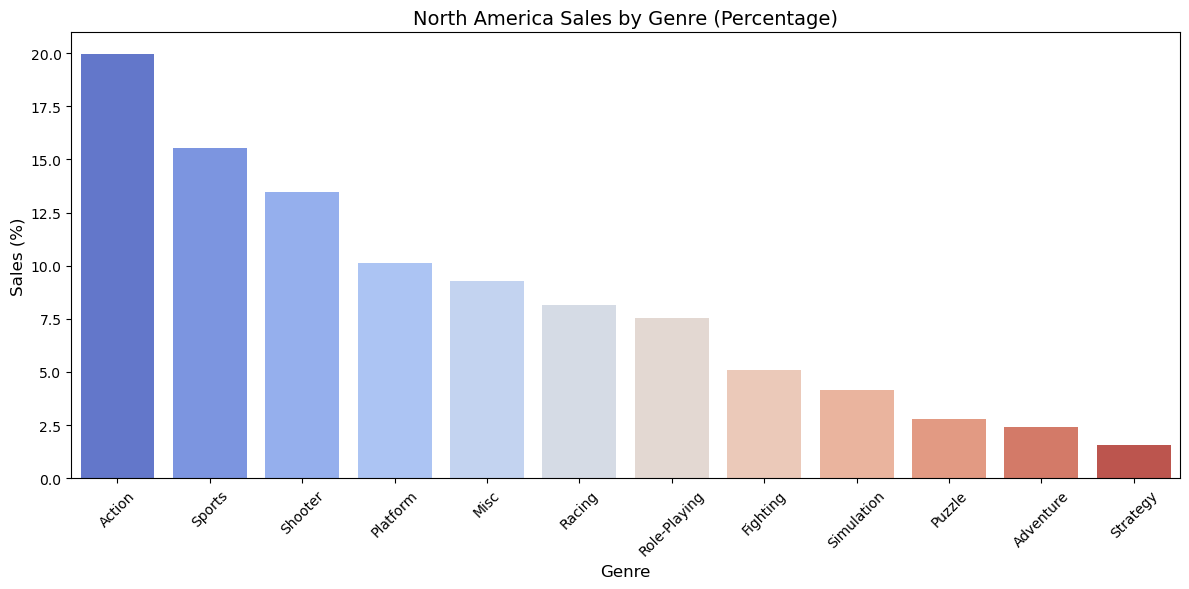

In [25]:
# Aggregate total sales by genre in North America and calculate percentage contribution
na_genre_sales = (
    games.groupby("genre")["na_sales"]
    .sum()
    .reset_index()
    .sort_values(by="na_sales", ascending=False)
)

# Calculate percentage of total NA sales per genre
na_genre_sales["na_sales_pct"] = na_genre_sales["na_sales"] / na_genre_sales["na_sales"].sum() * 100

# Bar plot of North American sales percentage by genre
plt.figure(figsize=(12,6))
sns.barplot(data=na_genre_sales, x="genre", y="na_sales_pct", palette="coolwarm")
plt.title("North America Sales by Genre (Percentage)", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Sales (%)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



C:\Users\Juan\AppData\Local\Temp\ipykernel_5864\3043083144.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=na_rating_sales, x="rating", y="na_sales_pct", palette="Spectral")


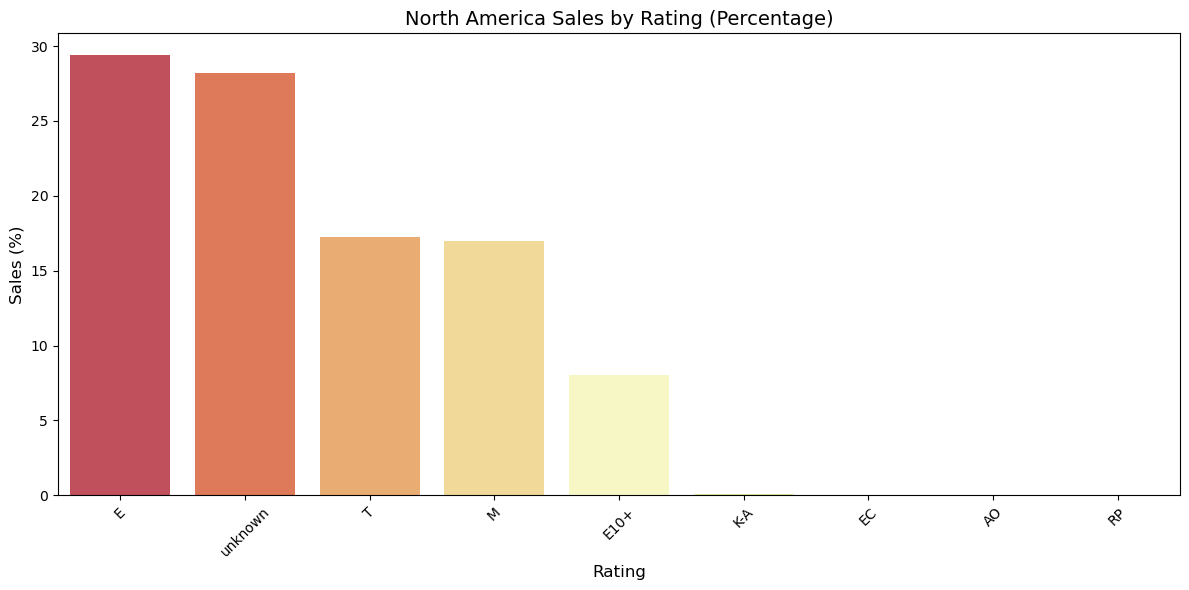

In [26]:
# Aggregate total sales by rating in North America and calculate percentage contribution
na_rating_sales = (
    games.groupby("rating")["na_sales"]
    .sum()
    .reset_index()
    .sort_values(by="na_sales", ascending=False)
)

# Calculate percentage of total NA sales per rating
na_rating_sales["na_sales_pct"] = na_rating_sales["na_sales"] / na_rating_sales["na_sales"].sum() * 100

# Bar plot of North American sales percentage by rating
plt.figure(figsize=(12,6))
sns.barplot(data=na_rating_sales, x="rating", y="na_sales_pct", palette="Spectral")
plt.title("North America Sales by Rating (Percentage)", fontsize=14)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Sales (%)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Juan\AppData\Local\Temp\ipykernel_5864\2000247064.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=eu_platform_sales, x="platform", y="eu_sales_pct", palette="Greens_r")


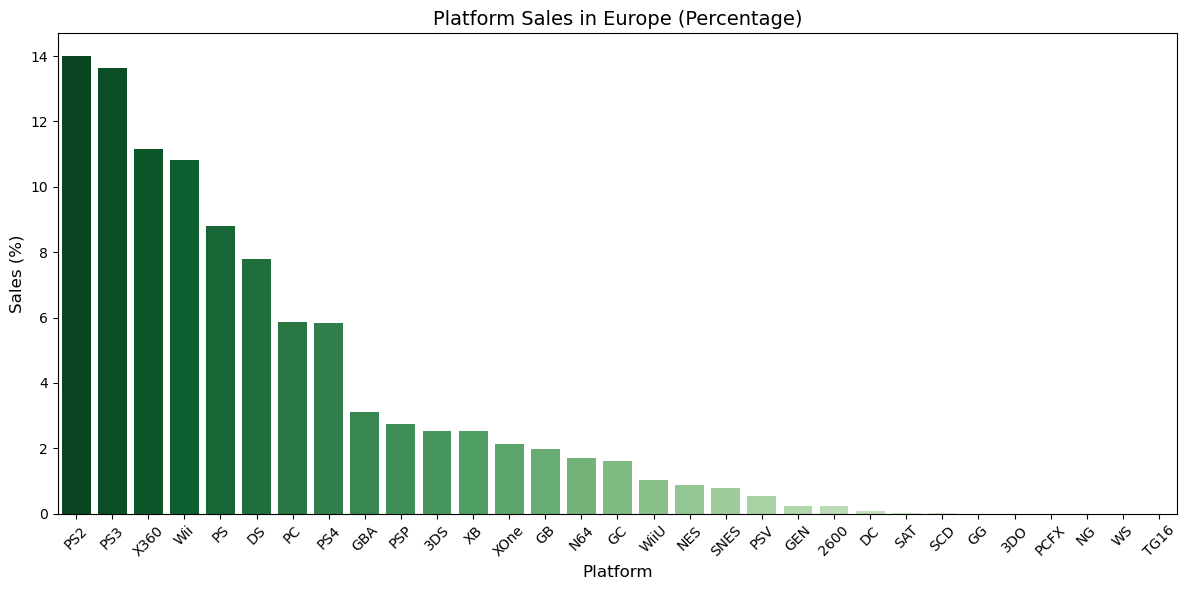

In [27]:
# Aggregate total sales by platform in Europe and calculate percentage contribution
eu_platform_sales = (
    games.groupby("platform")["eu_sales"]
    .sum()
    .reset_index()
    .sort_values(by="eu_sales", ascending=False)
)

# Calculate percentage of total EU sales per platform
eu_platform_sales["eu_sales_pct"] = eu_platform_sales["eu_sales"] / eu_platform_sales["eu_sales"].sum() * 100

# Bar plot of European sales percentage by platform
plt.figure(figsize=(12,6))
sns.barplot(data=eu_platform_sales, x="platform", y="eu_sales_pct", palette="Greens_r")
plt.title("Platform Sales in Europe (Percentage)", fontsize=14)
plt.xlabel("Platform", fontsize=12)
plt.ylabel("Sales (%)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Juan\AppData\Local\Temp\ipykernel_5864\3589294534.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=eu_genre_sales, x="genre", y="eu_sales_pct", palette="viridis")


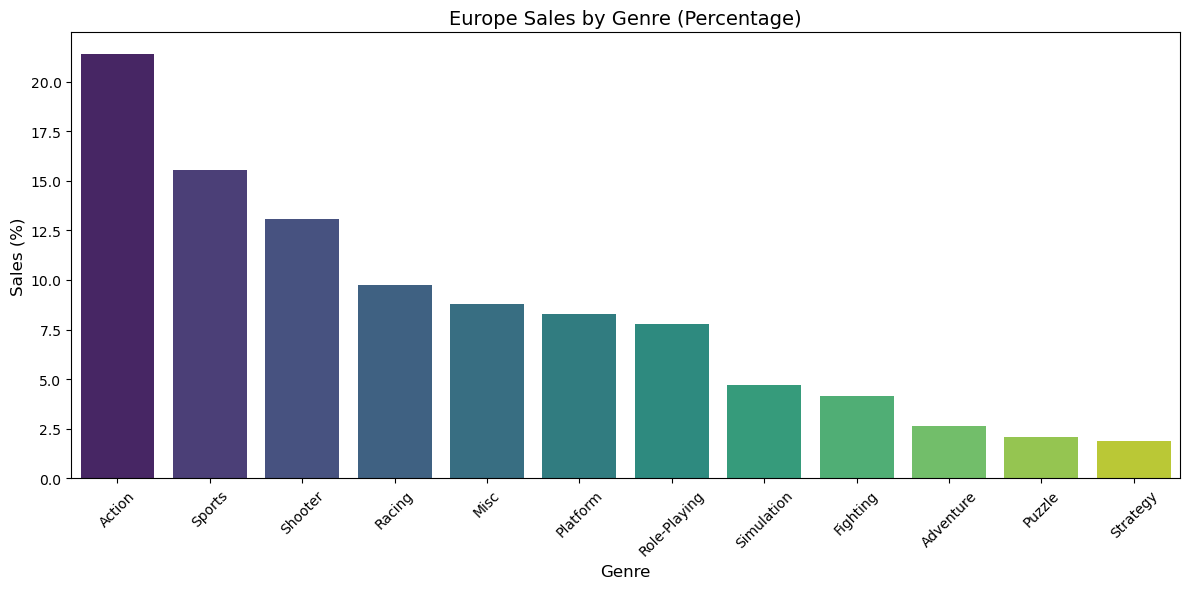

In [28]:
# Aggregate total sales by genre in Europe and calculate percentage contribution
eu_genre_sales = (
    games.groupby("genre")["eu_sales"]
    .sum()
    .reset_index()
    .sort_values(by="eu_sales", ascending=False)
)

# Calculate percentage of total EU sales per genre
eu_genre_sales["eu_sales_pct"] = eu_genre_sales["eu_sales"] / eu_genre_sales["eu_sales"].sum() * 100

# Bar plot of European sales percentage by genre
plt.figure(figsize=(12,6))
sns.barplot(data=eu_genre_sales, x="genre", y="eu_sales_pct", palette="viridis")
plt.title("Europe Sales by Genre (Percentage)", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Sales (%)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



C:\Users\Juan\AppData\Local\Temp\ipykernel_5864\1970505529.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=eu_rating_sales, x="rating", y="eu_sales_pct", palette="magma")


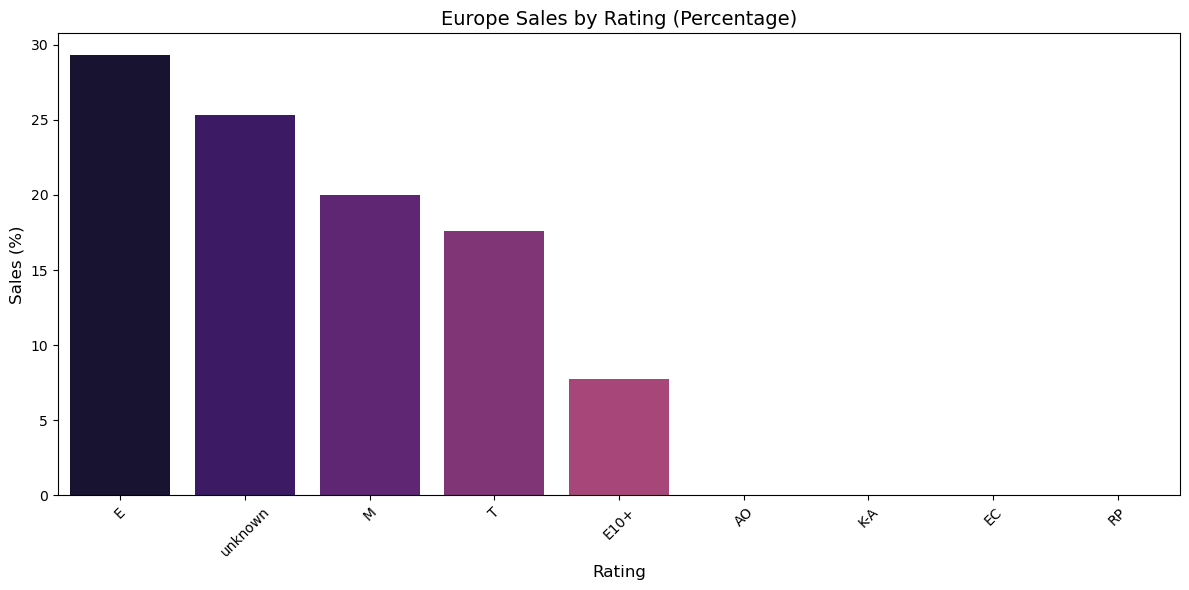

In [29]:
# Aggregate total sales by rating in Europe and calculate percentage contribution
eu_rating_sales = (
    games.groupby("rating")["eu_sales"]
    .sum()
    .reset_index()
    .sort_values(by="eu_sales", ascending=False)
)

# Calculate percentage of total EU sales per rating
eu_rating_sales["eu_sales_pct"] = eu_rating_sales["eu_sales"] / eu_rating_sales["eu_sales"].sum() * 100

# Bar plot of European sales percentage by rating
plt.figure(figsize=(12,6))
sns.barplot(data=eu_rating_sales, x="rating", y="eu_sales_pct", palette="magma")
plt.title("Europe Sales by Rating (Percentage)", fontsize=14)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Sales (%)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Juan\AppData\Local\Temp\ipykernel_5864\1559268901.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=jp_platform_sales, x="platform", y="jp_sales_pct", palette="coolwarm")


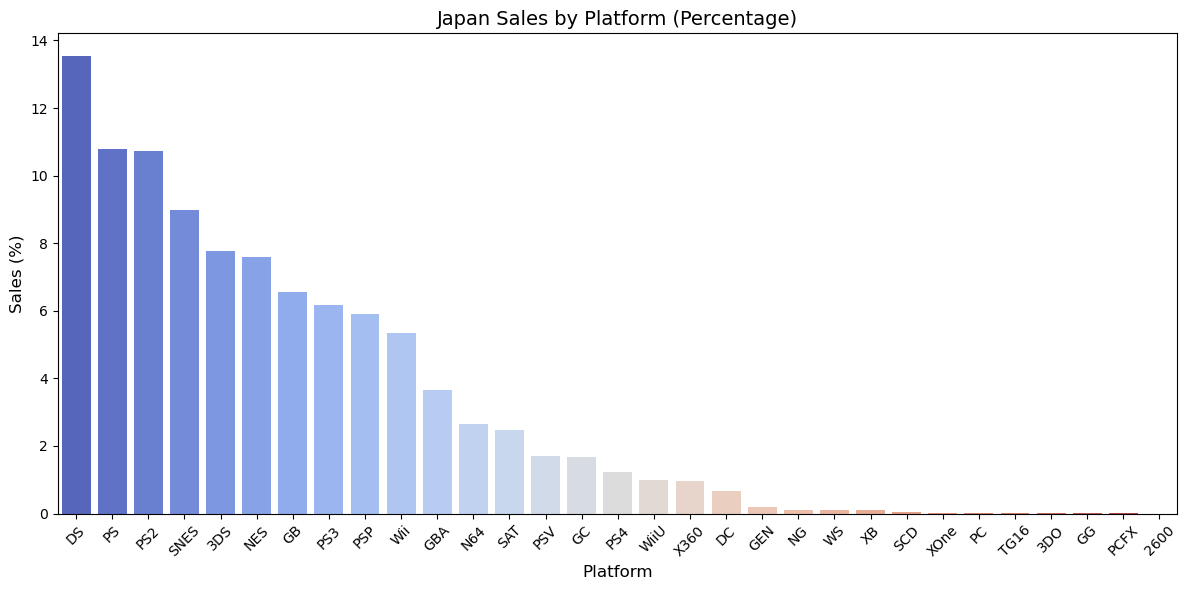

In [30]:
# Aggregate total sales by platform in Japan and calculate percentage contribution
jp_platform_sales = (
    games.groupby("platform")["jp_sales"]
    .sum()
    .reset_index()
    .sort_values(by="jp_sales", ascending=False)
)

# Calculate percentage of total JP sales per platform
jp_platform_sales["jp_sales_pct"] = jp_platform_sales["jp_sales"] / jp_platform_sales["jp_sales"].sum() * 100

# Bar plot of Japanese sales percentage by platform
plt.figure(figsize=(12,6))
sns.barplot(data=jp_platform_sales, x="platform", y="jp_sales_pct", palette="coolwarm")
plt.title("Japan Sales by Platform (Percentage)", fontsize=14)
plt.xlabel("Platform", fontsize=12)
plt.ylabel("Sales (%)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Juan\AppData\Local\Temp\ipykernel_5864\1409149364.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=jp_genre_sales, x="genre", y="jp_sales_pct", palette="Spectral")


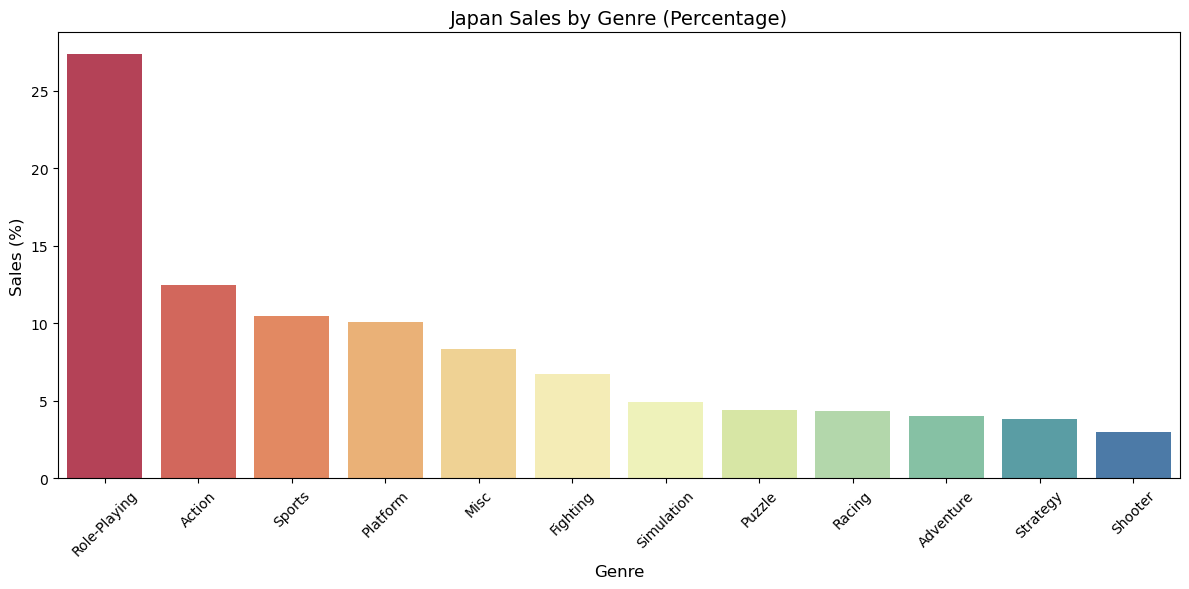

In [31]:
# Aggregate total sales by genre in Japan and calculate percentage contribution
jp_genre_sales = (
    games.groupby("genre")["jp_sales"]
    .sum()
    .reset_index()
    .sort_values(by="jp_sales", ascending=False)
)

# Calculate percentage of total JP sales per genre
jp_genre_sales["jp_sales_pct"] = jp_genre_sales["jp_sales"] / jp_genre_sales["jp_sales"].sum() * 100

# Bar plot of Japanese sales percentage by genre
plt.figure(figsize=(12,6))
sns.barplot(data=jp_genre_sales, x="genre", y="jp_sales_pct", palette="Spectral")
plt.title("Japan Sales by Genre (Percentage)", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Sales (%)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Juan\AppData\Local\Temp\ipykernel_5864\593219778.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=jp_rating_sales, x="rating", y="jp_sales_pct", palette="viridis")


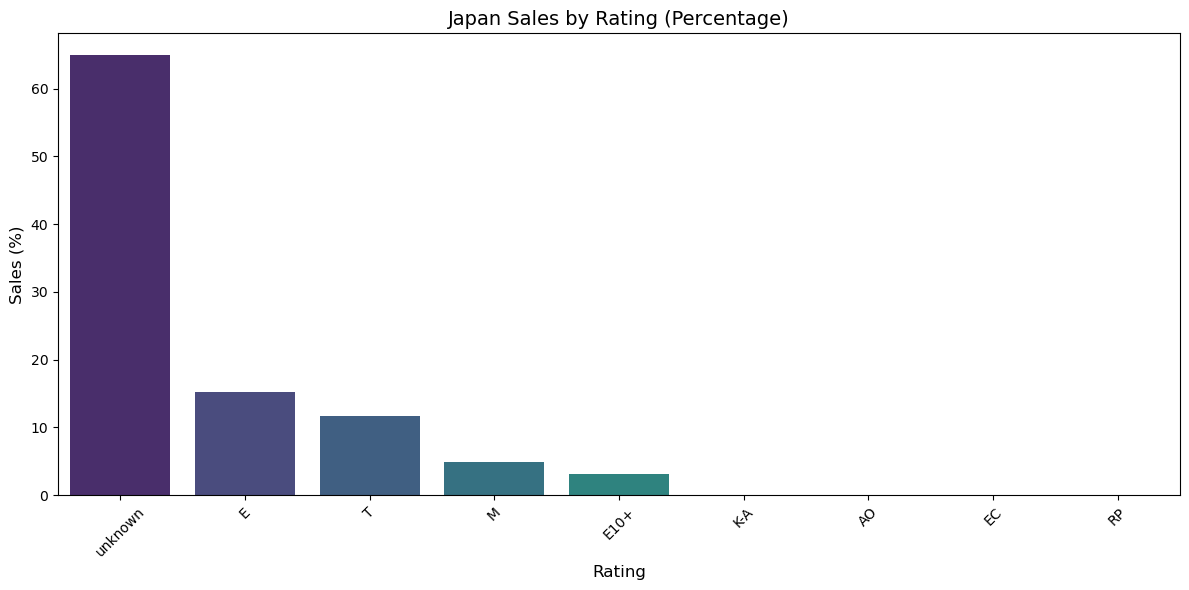

In [32]:
# Aggregate total sales by rating in Japan and calculate percentage contribution
jp_rating_sales = (
    games.groupby("rating")["jp_sales"]
    .sum()
    .reset_index()
    .sort_values(by="jp_sales", ascending=False)
)

# Calculate percentage of total JP sales per rating
jp_rating_sales["jp_sales_pct"] = jp_rating_sales["jp_sales"] / jp_rating_sales["jp_sales"].sum() * 100

# Bar plot of Japanese sales percentage by rating
plt.figure(figsize=(12,6))
sns.barplot(data=jp_rating_sales, x="rating", y="jp_sales_pct", palette="viridis")
plt.title("Japan Sales by Rating (Percentage)", fontsize=14)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Sales (%)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Main Platforms and Regional Variations

In North America (NA), the platforms with the largest market share were X360 (14%), PS2 (13%), and Wii (12%). In Europe (EU), the distribution varied slightly: PS2 (14%), PS3 (13%), and X360 (11%), indicating that the PS2 performed strongly in both regions, while the PS3 is more popular in Europe than in North America. Meanwhile, in Japan (JP), the top-selling platforms were DS (14%), PS (11%), and PS2 (11%), highlighting a clear preference for portable and classic consoles over the home consoles that dominate NA and EU.

Conclusion on Platforms:
The leading platforms differ by region, reflecting cultural and technological preferences. In NA and EU, modern home consoles prevail, whereas in JP, portable and older-generation consoles dominate. This suggests that marketing strategies need to be region-specific: what sells in North America and Europe may not necessarily be popular in Japan.

## Top Genres and Regional Differences

In North America (NA), the best-selling genres were Action (20%), Sports (15%), and Shooter (13%). In Europe (EU), the pattern is very similar: Action (21%), Sports (15%), and Shooter (12.5%), indicating similar preferences across these two regions. However, in Japan (JP), the top-selling games are concentrated in Role-Playing (27%), followed by Action (13%) and Sports (10%), reflecting a clear preference for story-driven and narrative-rich games.

Conclusion on Genres:
The most profitable genres vary by region: NA and EU show strong demand for action and sports games, while role-playing games dominate in JP. This highlights the importance of tailoring game development and marketing strategies to local tastes.

## Regional Differences in ESRB Ratings

In North America (NA), the Everyone rating (29%) leads sales, followed by Unrated games (28%) and Teen/Adult games (16% each). In Europe (EU), the trend is similar: Everyone (29%) and Unrated (25%) dominate, although Adult games represent a slightly higher proportion (20%). In Japan (JP), most sales correspond to Unrated games (63%), while Everyone and Teen games account for only 13% and 11%, respectively.

Conclusion on ESRB Ratings:
Ratings influence sales differently across regions. In NA and EU, games suitable for all audiences or unrated are the most popular, possibly reflecting more flexible regulations or a preference for family-friendly content. In JP, unrated games dominate, which may be due to different local rating systems or a lower relevance of official ratings to consumers.

### Pruebas de hipótesis:

La hipótesis nula será que la media de las calificaciones de los usuarios de XOne y la media de las calificaciones de los usuarios de PC son iguales, mientras que la hipótesis alternativa es que son diferentes. Para este caso vamos a utilizar una prueba t-test para muestras independientes, dado que las dos muestras son muestras independientes. Finalmente, se hará un análisis de hipótesis de dos colas, dado que la dirección no importa en este caso.

In [33]:
# Filter data by platform
xone_scores = games.loc[games["platform"] == "XOne", "user_score"].dropna()
pc_scores   = games.loc[games["platform"] == "PC", "user_score"].dropna()

# Levene's test for equality of variances
levene_stat, levene_p = st.levene(xone_scores, pc_scores)
print(f"Levene's test statistic: {levene_stat:.4f}, p-value: {levene_p:.4f}")

# Decide equal_var based on Levene's test
equal_var_flag = True if levene_p >= 0.05 else False
print(f"Equal variances assumption for t-test: {equal_var_flag}")

# Perform t-test (Welch if variances unequal)
t_stat, p_value = st.ttest_ind(xone_scores, pc_scores, equal_var=equal_var_flag)
print(f"t-test statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

# Hypothesis interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H₀: the means are significantly different")
else:
    print("Fail to reject H₀: not enough evidence to conclude the means are different")

Levene's test statistic: 1.2213, p-value: 0.2694
Equal variances assumption for t-test: True
t-test statistic: -4.3683, p-value: 0.0000
Reject H₀: the means are significantly different


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Al realizar una prueba de hipótesis, es muy importante verificar los supuestos. El t-test que usaste funciona bien cuando se cumplen ciertos supuestos, como que las varianzas de ambos grupos (sábados lluviosos y no lluviosos) sean similares. Puedes realizar la prueba de levene para comprobar que los dos grupos tienen la misma varianza y, de esta forma, podrás saber el valor del parámetro equal_var que se debe utilizar en la función stats.ttest_ind.

</div>

The null hypothesis (H₀) states that the mean user scores for Action games and Sports games are equal, while the alternative hypothesis (H₁) states that they are different. Since the two samples are independent, an independent two-sample t-test will be used to compare the means. Additionally, a two-tailed test will be performed, as the direction of the difference is not of interest.

Before performing the t-test, a Levene's test for equality of variances was conducted. This step is crucial because the standard t-test assumes equal variances between the groups. If this assumption is violated, the test could give misleading results. By checking the variances with Levene's test, we ensure that the t-test is applied appropriately: if variances are unequal, the Welch's t-test is used, which does not assume equal variances and provides a more robust comparison

In [34]:
# Filtrar datos por género
action = games[games["genre"] == "Action"]
sports = games[games["genre"] == "Sports"]

action_score = action["user_score"].dropna()
sports_score = sports["user_score"].dropna()

# Prueba de Levene para igualdad de varianzas
levene_stat, levene_p = st.levene(action_score, sports_score)
print(f"Levene's test p-value: {levene_p:.4f}")

# Decidir igualdad de varianzas según resultado de Levene
equal_var = True if levene_p > 0.05 else False

# Prueba t de dos muestras (independientes)
t_stat, p_value = st.ttest_ind(action_score, sports_score, equal_var=equal_var)
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Reject H₀: the means are significantly different")
else:
    print("Fail to reject H₀: no sufficient evidence to say the means are different")

Levene's test p-value: 0.0002
t-statistic: 1.5775
p-value: 0.1148
Fail to reject H₀: no sufficient evidence to say the means are different


### Step 6: General Conclusion

The analysis of video game sales data allows us to identify clear patterns based on platform, genre, and region. Throughout the study, we observed that certain platforms dominate sales in different regions: X360, PS2, and Wii in North America; PS2, PS3, and X360 in Europe; and DS, PS, and PS2 in Japan. Similarly, the best-selling genres vary, with Action and Sports prevailing in NA and EU, while Role-Playing leads in Japan. This reflects cultural differences and regional market preferences.

Regarding ESRB ratings, they affect sales differently across regions. For example, in Japan, most sold games are unrated, whereas in NA and EU the "Everyone" category accounts for a large share of sales, indicating that the target age group impacts commercial performance in each market.

When evaluating the relationship between reviews and sales, we found that critic scores have a moderate correlation with sales, while user scores show little relationship. This suggests that, for certain platforms, professional reviews may be a better predictor of success than player opinions.

In comparative analyses of platforms and genres, hypothesis testing indicated the following: the difference in mean user scores between XOne and PC was statistically significant, whereas there was insufficient evidence to conclude that the average sales of Action and Sports genres were different. This implies that, although some platforms show clear advantages, certain genres perform relatively comparably.

Overall, the findings demonstrate that decisions for launching successful games depend on multiple factors: platform, genre, rating, and region. It also highlights that outliers and blockbuster games can skew average sales, so interpreting medians and using logarithmic distributions provides a more reliable understanding of actual market behavior.